# YOLO v8 Tutorial
Por: Lucas Yuji Matubara

## 1 Instalação do YOLO
Para sua instalação será necessário:

### 1.1 Instalar o Python
Caso tenha duvida digite no seu terminal:
Python3 --version
ou
Python --version

Caso precise instalar:
sudo apt-get update
sudo apt-get upgrade
sudo apt-get install python3 python3-dev

### 1.2 Instalar o pip
O pip é uma ferramenta disponibilizada junta ao python para fazer a instalação dos pacotes e bibliotecas que utilizará.
Caso tenha duvida digite:
pip3 --version
ou
pip --version

Caso precise instalar:
sudo apt-get update
sudo apt-get upgrade
sudo apt install python3-pip

### 1.3 Instalar o ultralytics
O ultralytics é um conjunto de ferramentas e bibliotecas para sistemas de visão computacional, ele utiliza o PyTorch e contém o YOLO.

Caso precise instalar:
pip3 install ultralytics
ou
pip install ultralytics

In [10]:
from ultralytics import YOLO

In [11]:
model = YOLO('yolov8n.pt')  #passar o nome do modelo a ser importado

## 2 Baixando Imagens de Treino
Para fazer o treinamento do YOLO será necessário um conjunto de imagens dos objetos específicos a serem treinados com notações que delimitam na imagem onde está esse objeto. O problema aqui é que as imagens devem vir com labels que delimitam na imagem o objeto especificado para que o YOLO possa aprender, só que existem várias versões do YOLO e do que eu pesquisei algumas tinham especificações diferentes. Mas sei que a versões 8 possui o mesmo formato da versão 7, essa será a parte mais dificil de compreender, vamos lá.

### 2.1 Onde Baixar as Imagens
Nesse tutorial eu utilizei um guia no youtube e acabei utilizando o mesmo repositório, se quiser fazer igual basta baixar os arquivos zipados que postei junto com esse tutorial. Mas você também pode procurar outras formas para baixar, a que seria mais importante aprender é como baixar imagens e labels diretamente do https://storage.googleapis.com/openimages/web/index.html seria um passo muito importante, mas meu foco atual era conseguir treinar o YOLO então tomei um atalho.

### 2.2 Labels
Caso queira, existem diversas ferramentas para anotar labels nas imagens que você tiver, a que recomendarei aqui é: https://github.com/HumanSignal/labelImg, mas sinta-se livre para ir atrás da que preferir

### 2.3 Organização
***Sem isso a função model.train não funcionará.*** Vamos aprender como organizar as pastas para o YOLO reconhecer. Primeiro você terá que criar, no mesmo local que o arquivo python para treinar o YOLO, uma pasta, podendo levar o nome que quiser. Em sequência, dentro desta nova pasta você precisará criar mais três pastas, uma para treinar, outra para testar, e outra para validar; apesar de eu ter dito 3 você não precisa criar a validar se não quiser, ficando somente com as outras duas. Cada pasta desta criada deverá conter outra duas, e ***com os exatos mesmos nomes ditos aqui***, uma chamará ***images*** e a outra ***labels***(Com esses nomes!). O YOLO só reconhecerá assim. Essas duas são autoexplicativas, uma contém as imagens e a outra as labels(descrição de onde está o objeto na imagem no formato do YOLOvX), ***os arquivos de imagens devem levar os mesmos nomes*** por exceção da extensão, onde uma será .jpg e a outra .txt. A disposição das pastas deve ficar assim:

- data(pode levar qualquer nome)
    - test(pode levar qualquer nome)
        - images
        - labels
    - train(pode levar qualquer nome)
        - images
        - labels
    - valid(pode levar qualquer nome)
        - images
        - labels
- main.python(seu arquivo aqui que treinará o YOLO)

### 2.4 Arquivo yaml
O arquivo yaml vai levar apenas os caminhos(path) para os seus diretórios para o YOLO reconhecer, ele é da seguinte forma:


In [12]:
'''
# Ultralytics YOLO 🚀, AGPL-3.0 license
# Yolov8CarDetection Dataset in YOLO format dataset https://www.kaggle.com/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision by KYLE GRAUPE
# Example usage: yolo train data=custom_dataset.yaml
# parent
# ├── ultralytics
# └── data
#     └── WindTurbines


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /home/yuji/Desktop/Visual Studio Code Repository/Warthog/Yolov8/data  # dataset root dir
train: train  # train images (relative to 'path')
val: valid  # val images (relative to 'path')
test: test  # test images (relative to 'path')

# Classes
names:
0: cable_tower
1: turbine'''

"\n# Ultralytics YOLO 🚀, AGPL-3.0 license\n# Yolov8CarDetection Dataset in YOLO format dataset https://www.kaggle.com/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision by KYLE GRAUPE\n# Example usage: yolo train data=custom_dataset.yaml\n# parent\n# ├── ultralytics\n# └── data\n#     └── WindTurbines\n\n\n# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]\npath: /home/yuji/Desktop/Visual Studio Code Repository/Warthog/Yolov8/data  # dataset root dir\ntrain: train  # train images (relative to 'path')\nval: valid  # val images (relative to 'path')\ntest: test  # test images (relative to 'path')\n\n# Classes\nnames:\n0: cable_tower\n1: turbine"

Note que ele deve estar na mesma pasta que o seu código python que treinará o YOLO, e aqui você deve alterar o path, o nome das pastas e as classes que irá treinar. Salve ele como nomequequiser.yaml

## 3 Treinando o YOLO

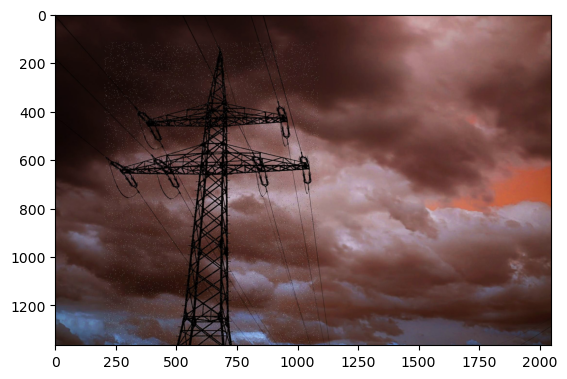

In [13]:
import cv2
import matplotlib.pyplot as plt

#teste para ver se consegue encontrar a imagem, altere para o seu diretório
caminho_img = '/home/yuji/Desktop/Visual Studio Code Repository/Warthog/Yolov8/data/train/images/cabletower5_jpg.rf.8af835f97155cbb598802b0e8e17486f.jpg'
img = cv2.imread(caminho_img)
plt.imshow(img)

In [14]:
resultados = model.predict(source = img)    #ver se o YOLO consegue rodar a imagem


0: 448x640 (no detections), 57.2ms
Speed: 2.4ms preprocess, 57.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


In [15]:
resultados  #o YOLO consegue detectar imagens sem treinamento especializado, mas os objetos são poucos e estão especificados a baixo, aqui ele mostra o que reconheceu na imagem

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [16]:
from ultralytics.utils.downloads import GITHUB_ASSETS_STEMS
GITHUB_ASSETS_STEMS #lista completa de arquiteturas disponíveis

['yolov8n',
 'yolov8n-cls',
 'yolov8n-seg',
 'yolov8n-pose',
 'yolov8s',
 'yolov8s-cls',
 'yolov8s-seg',
 'yolov8s-pose',
 'yolov8m',
 'yolov8m-cls',
 'yolov8m-seg',
 'yolov8m-pose',
 'yolov8l',
 'yolov8l-cls',
 'yolov8l-seg',
 'yolov8l-pose',
 'yolov8x',
 'yolov8x-cls',
 'yolov8x-seg',
 'yolov8x-pose',
 'yolov5nu',
 'yolov5n6u',
 'yolov5su',
 'yolov5s6u',
 'yolov5mu',
 'yolov5m6u',
 'yolov5lu',
 'yolov5l6u',
 'yolov5xu',
 'yolov5x6u',
 'yolov3u',
 'yolov3-sppu',
 'yolov3-tinyu',
 'yolo_nas_s',
 'yolo_nas_m',
 'yolo_nas_l',
 'sam_b',
 'sam_l',
 'FastSAM-s',
 'FastSAM-x',
 'rtdetr-l',
 'rtdetr-x',
 'mobile_sam']

In [17]:
from ultralytics import settings
settings.update({'runs_dir': './runs'}) #aqui eu estou modificando uma configuração da biblioteca, ele salvará o histórico de treinamento validação e testes na mesma pasta desse aquivo
settings

{'settings_version': '0.0.4',
 'datasets_dir': '/home/yuji/Desktop/Visual Studio Code Repository/Warthog/Yolov8/datasets',
 'weights_dir': 'weights',
 'runs_dir': './runs',
 'uuid': 'c96e5f0f0890163cff7a851bf5a06bc1fb7e5227bb4301f6a950b50150d8b323',
 'sync': True,
 'api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': True}

Treinamento

In [20]:
model = YOLO('yolov8n')
model.train(data = 'custom_dataset.yaml', epochs=1, patience=30, workers=3) #se você conseguiu rodar esse cara aqui parabéns e.e

New https://pypi.org/project/ultralytics/8.0.215 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom_dataset.yaml, epochs=1, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=3, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, au

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7feeb76bd0c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# 4 Validação

In [22]:
results = model.val
results

<bound method Model.val of YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, a

# 5 Inferência

In [28]:
from PIL import Image

In [29]:
img_pil = Image.open(caminho_img)   #abre em RGB

In [30]:
results_img = model.predict(source = caminho_img)   #processa e identifica localização do objeto na imagem
results_img


image 1/1 /home/yuji/Desktop/Visual Studio Code Repository/Warthog/Yolov8/data/train/images/cabletower5_jpg.rf.8af835f97155cbb598802b0e8e17486f.jpg: 448x640 4 cable_towers, 1 turbine, 73.8ms
Speed: 2.7ms preprocess, 73.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cable_tower', 1: 'turbine'}
 orig_img: array([[[ 25,  11,  12],
         [ 26,  12,  13],
         [ 26,  12,  13],
         ...,
         [103,  57,  49],
         [103,  57,  49],
         [103,  57,  49]],
 
        [[ 25,  11,  12],
         [ 27,  13,  14],
         [ 27,  13,  14],
         ...,
         [103,  57,  49],
         [103,  57,  49],
         [103,  57,  49]],
 
        [[ 26,  12,  13],
         [ 27,  13,  14],
         [ 28,  14,  15],
         ...,
         [103,  57,  49],
         [103,  57,  49],
         [103,  57,  49]],
 
        ...,
 
        [[ 51,  39,  37],
         [ 51,  39,  37],
         [ 51,  39,  37],
         ...,
         [ 45,  33,  23],
         [ 45,  33,  23],
         [ 45,  33,  23]],
 
        [[ 50,  38,  36],
         [ 50,  38,  36],
         [ 50,  38,  36],
         ...,
         [

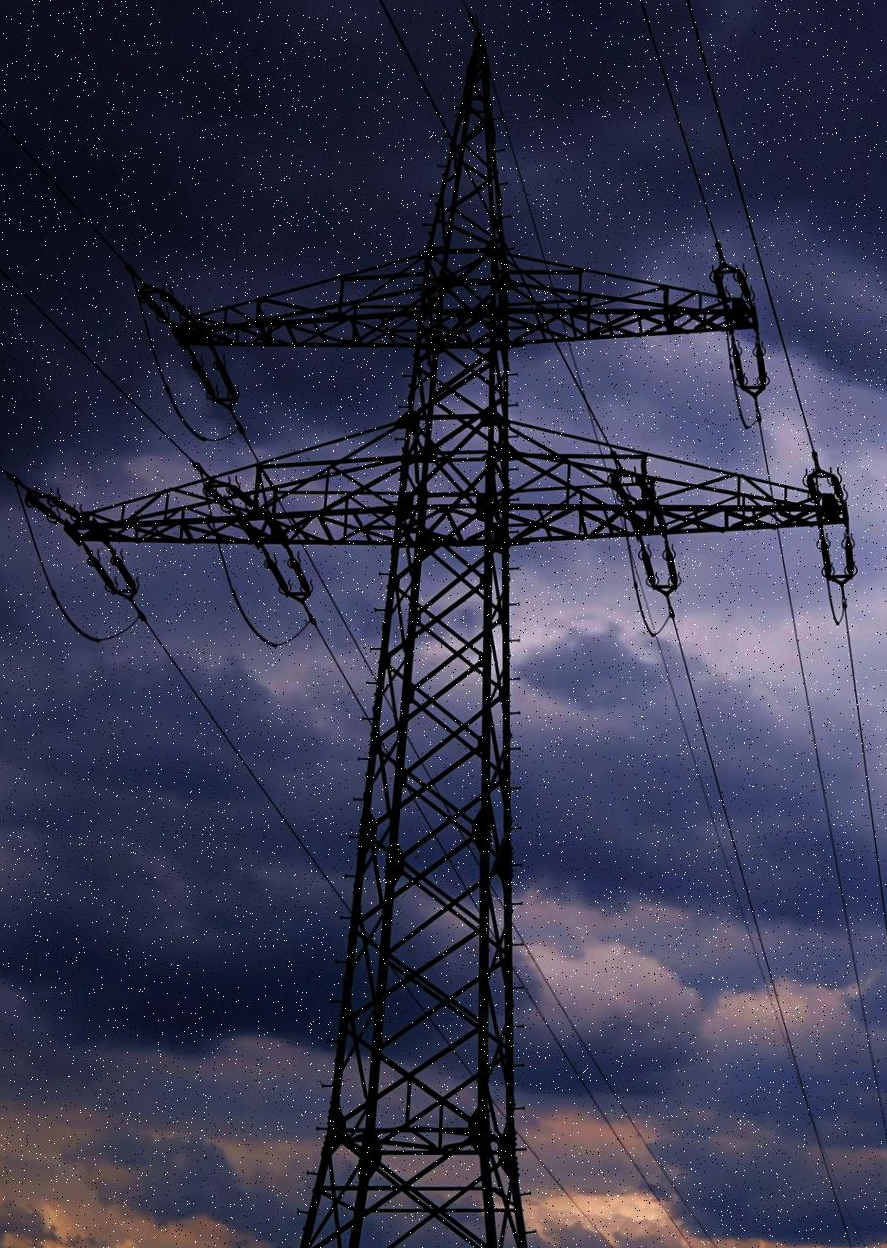

In [32]:
xyxy = results_img[0].boxes.xyxy.cpu().numpy()  #pegamos as coordenadas para cortar a imagem
img_pil.crop((xyxy[0][0], xyxy[0][1], xyxy[0][2], xyxy[0][3]))  #recortamos o objeto da imagem

In [4]:
import cv2

# Inicie a captura de vídeo em tempo real
cap = cv2.VideoCapture(0)  # Use 0 para a câmera padrão ou forneça o caminho do vídeo

while True:
    ret, frame = cap.read()

    # Realize a detecção de objetos no frame
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layer_names = net.getUnconnectedOutLayersNames()
    detections = net.forward(layer_names)

    # Processar as detecções e desenhar caixas delimitadoras no frame
    # (depende da estrutura específica do seu modelo e dos dados de saída)

    # Exiba o resultado no frame
    cv2.imshow('Detecção YOLO em Tempo Real', frame)

    # Saia do loop se a tecla 'q' for pressionada
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

NameError: name 'model' is not defined

# 6 Conclusão

### 6.1 Parâmetros
Existem muitos parâmetros que podem ser alterados durante o treinamento e teste do YOLO, não irei trabalhar nenhum deles aqui, mas é bom saber. Quando carregar o treinamento será possível ver todos seus parâmetros

### 6.2 Resultados
Ao finalizar será possível ver dentro de runs/detect/train vários diagramas e gráficos que o YOLO gera, como a matriz de confusão, analises de dataset, anotações, etc.

### 6.3 Referência
Caso queira acompanhar, o vídeo que utilizei de base foi: https://www.youtube.com/watch?v=oq0NpJh8vJY&t=1297s&ab_channel=ProgramadorArtificial